## Load and Inspect Dataset

In [2]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
file_path = "E:\Credit Risk\credit_risk_dataset.csv"
data = pd.read_csv(file_path)
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Ahmad Reza\AppData\Local\Temp\ipykernel_12080\2964065930.py:1: SyntaxWarning: invalid escape sequence '\C'
  file_path = "E:\Credit Risk\credit_risk_dataset.csv"


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [5]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Data Inspection and Cleaning

From the descriptive statistics, it is observed that the maximum value of `person_emp_length` is 123, which does not make sense.  
Considering a typical career starts at age 18 and the maximum age in the dataset is 65, the maximum possible employment length should be around 47 years.  

Therefore, values of `person_emp_length` greater than 47 are considered outliers and will be removed or capped to ensure data quality.  


### Preserve Original Data

To keep the original dataset unchanged, a copy of the data is created for preprocessing and analysis.  
This ensures the raw data can be referenced later or reused if needed.


In [8]:
data_copy = data.copy()

## Exploratory Data Analysis (EDA)

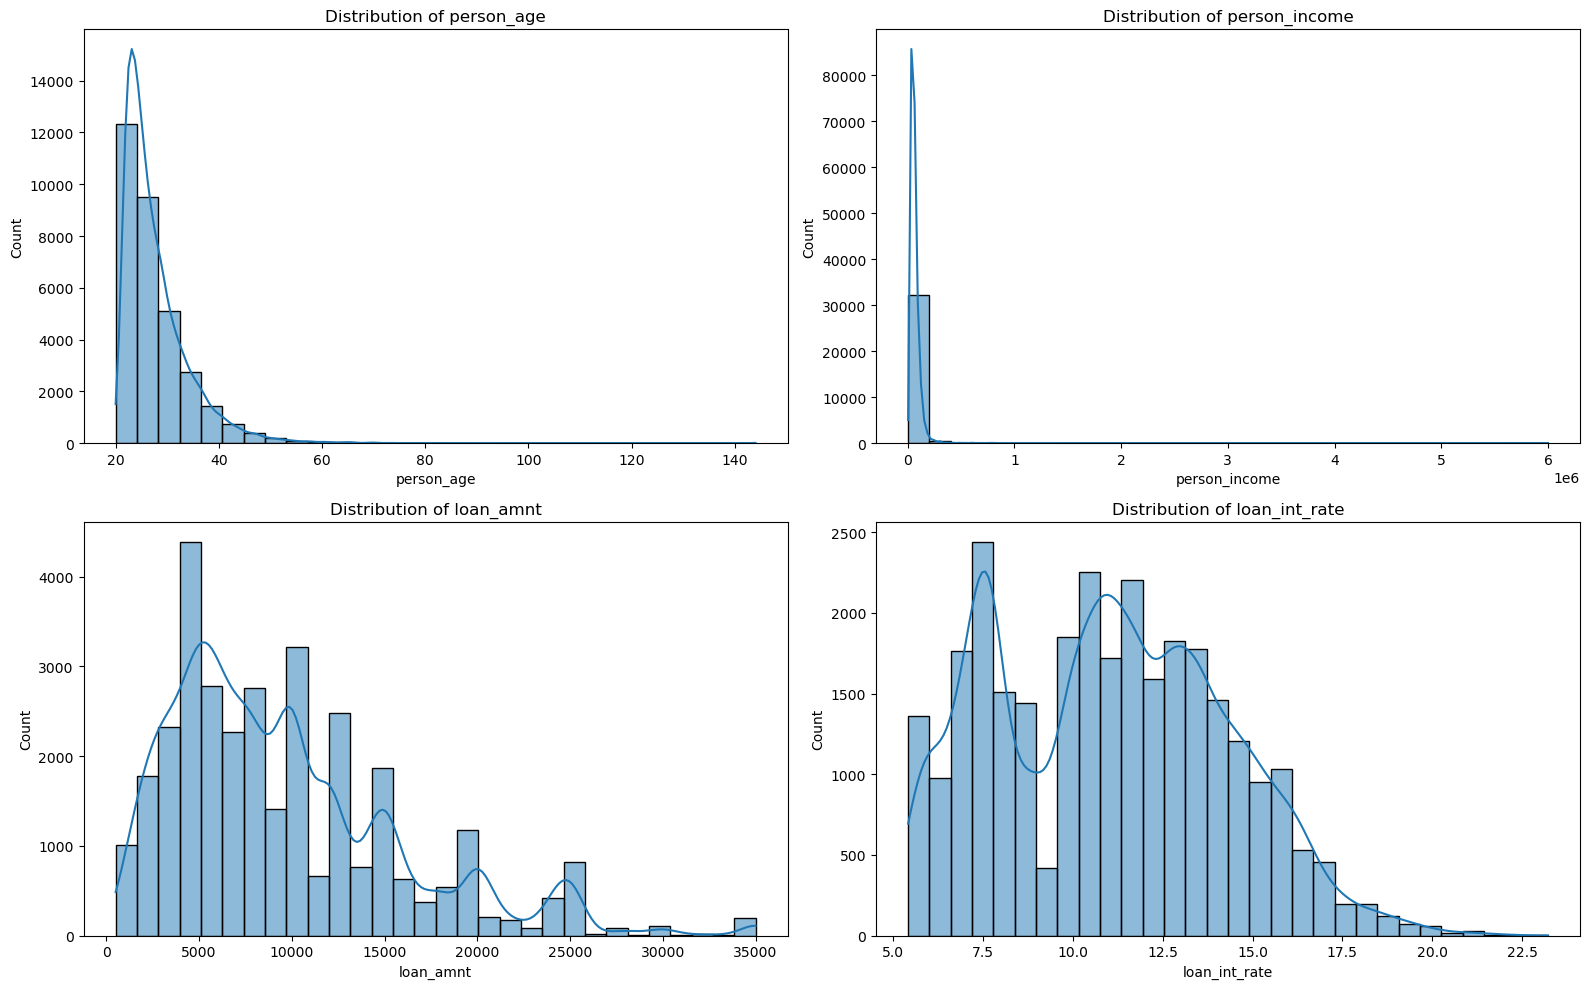

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of key numeric features
numeric_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

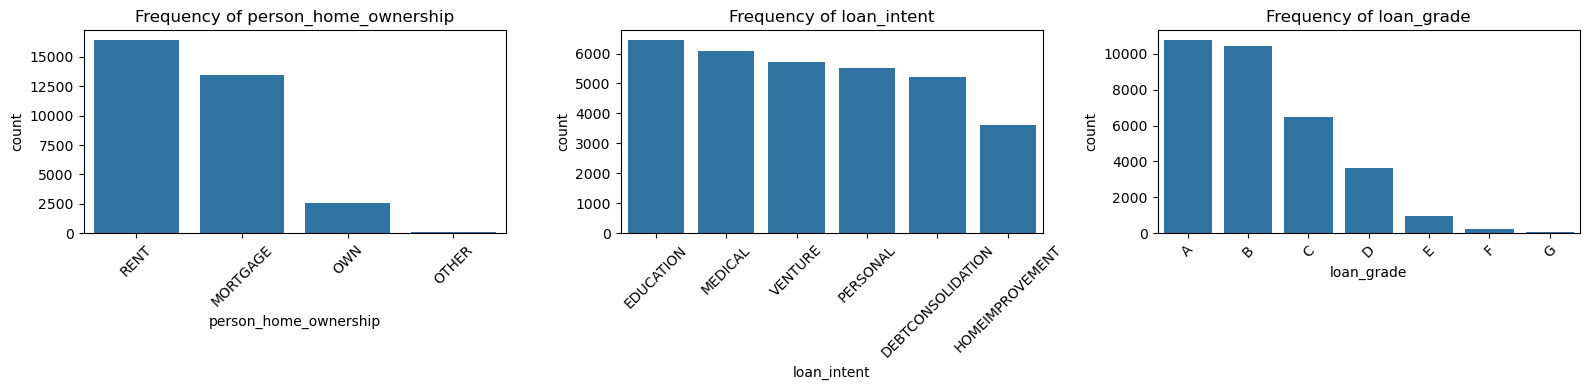

In [12]:
# Visualize categorical feature frequencies
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade']
plt.figure(figsize=(16, 4))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

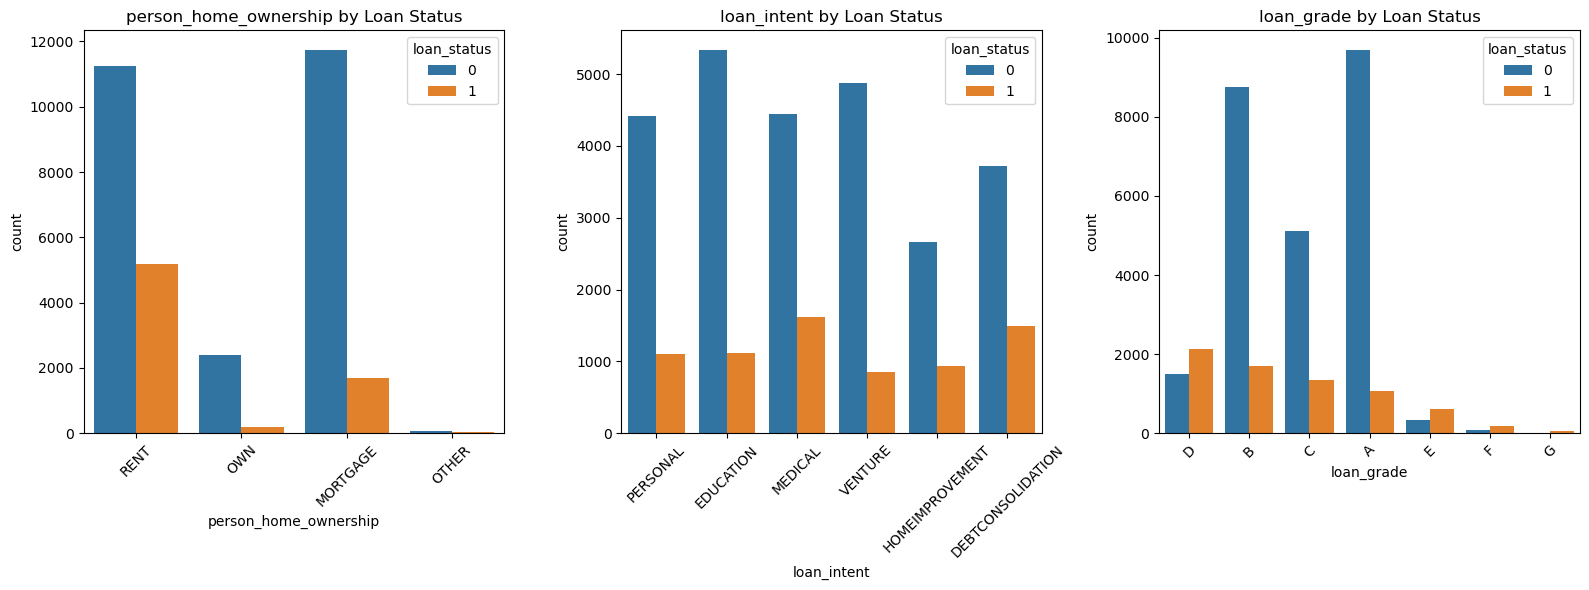

In [13]:
# Analyze relationships between categorical features and target loan_status
plt.figure(figsize=(16, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=feature, hue='loan_status')
    plt.title(f'{feature} by Loan Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

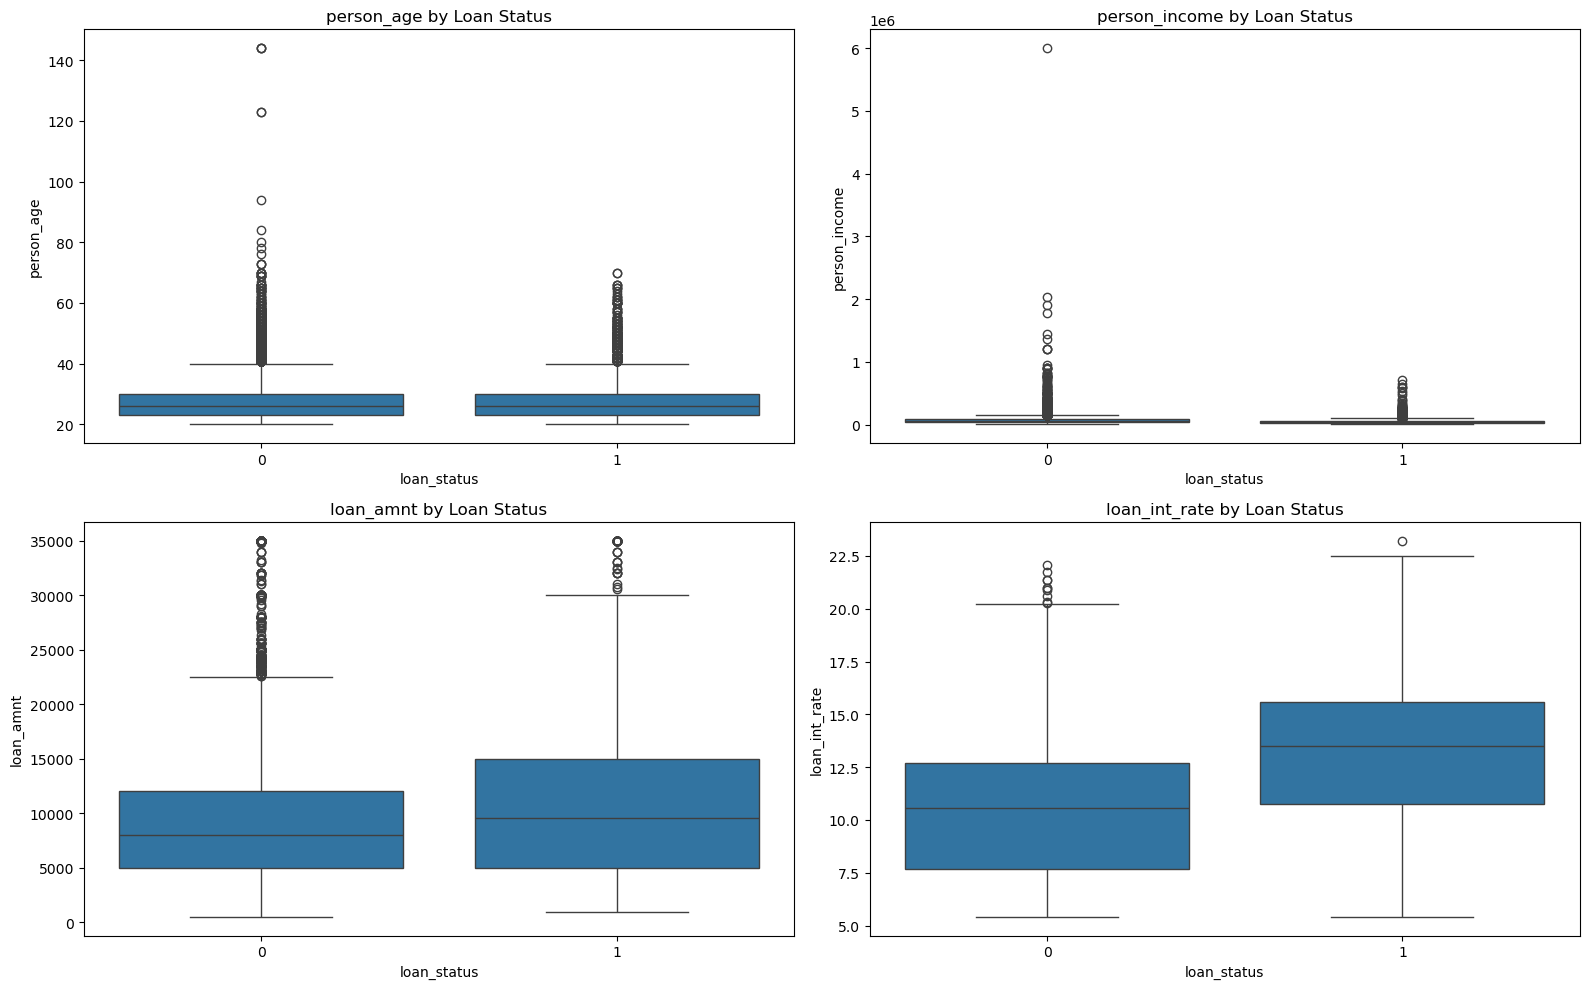

In [14]:
# Numeric features grouped by loan_status: boxplots
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x='loan_status', y=feature)
    plt.title(f'{feature} by Loan Status')
plt.tight_layout()
plt.show()

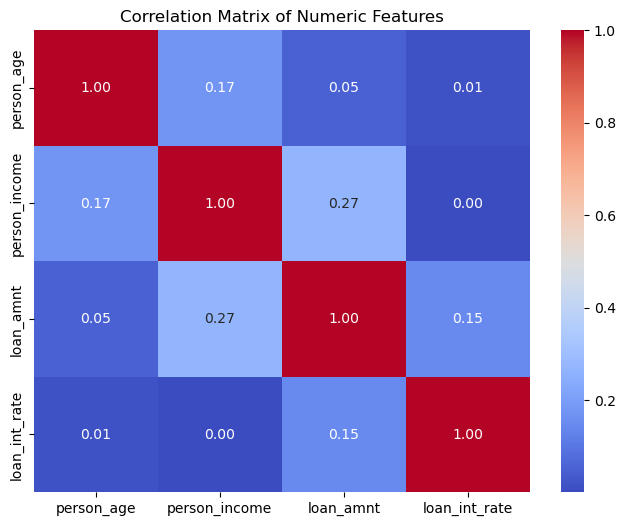

In [15]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
corr = data[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Feature Engineering

### Loan Status Distribution by Person Age

The following table shows the count of loans by `person_age` and `loan_status`.  
This helps to understand how loan default or approval varies with borrower age.


In [18]:
#data.pivot_table(index = 'person_age', columns = 'loan_status', values = 'person_income', aggfunc = 'count').reset_index().sort_values(by = 'person_age', ascending = False)

### Removing Unrealistic Employment Lengths and Verifying Person Age

Since the typical working career spans from age 18 to 65, the maximum reasonable employment length is 47 years.  
To ensure data quality, all records with `person_emp_length` greater than 47 are removed from the dataset.  
Additionally, `person_age` is verified to fall within a realistic range (20 to 70 years in this dataset) to exclude any outliers or data entry errors.  
This helps maintain the integrity of the data for subsequent analysis.


In [20]:

data_rmvd = data[data['person_age']<=70]
data_rmvd.reset_index(drop = True, inplace = True)
data_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Loan Status Distribution by Person Age

The following table presents the count of loans for each `person_age` grouped by `loan_status`.  
This analysis helps to understand the relationship between borrower age and loan outcomes, such as approval or default rates.  
By observing the distribution, patterns or risk profiles associated with different age groups can be identified, which is valuable for credit risk assessment.


In [22]:
#data_rmvd.pivot_table(index = 'person_emp_length', columns = 'loan_status', values = 'person_income', aggfunc = 'count').reset_index().sort_values(by = 'person_emp_length', ascending = False)

### Removing Unrealistic Employment Lengths

Since the typical working career spans from age 18 to 65, the maximum reasonable employment length is 47 years.  
To ensure data quality, all records with `person_emp_length` greater than 47 are removed from the dataset.  
The dataset is then reset with new indexing for subsequent analysis.


In [24]:
person_emp_rmvd = data_rmvd[data_rmvd['person_emp_length']<=47]
person_emp_rmvd.reset_index(drop=True, inplace=True)
person_emp_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [25]:
person_emp_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,28626.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.040070,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.229507,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [26]:
person_emp_rmvd.isnull().sum()
person_emp_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [27]:
cr_data = person_emp_rmvd.copy()
cr_data.head().shape
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


### Handling Missing Values in Loan Interest Rate

The `loan_int_rate` column contains some missing values which can affect analysis and model performance.  
To address this, the missing values are replaced with the median loan interest rate, which is a robust measure of central tendency less affected by outliers.  
This imputation helps maintain data integrity without skewing the distribution significantly.


In [29]:
cr_data.fillna({'loan_int_rate' : cr_data['loan_int_rate'].median()}, inplace = True)
cr_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [30]:
cr_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.035256,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.070364,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Categorical Features Treatment

In [32]:
cr_data.groupby('loan_intent').count()['person_home_ownership']

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5891
PERSONAL             5365
VENTURE              5553
Name: person_home_ownership, dtype: int64

In [33]:
cr_data.groupby('person_home_ownership').count()['loan_intent']

person_home_ownership
MORTGAGE    13088
OTHER         107
OWN          2410
RENT        16066
Name: loan_intent, dtype: int64

In [34]:
cr_data_copy = cr_data.drop('loan_grade', axis = 1)
cr_data_copy.shape

(31671, 11)

In [35]:
cat_data = cr_data_copy.copy()

In [36]:
person_home_ownership = pd.get_dummies(cat_data['person_home_ownership'], drop_first=True).astype(int)
loan_intent = pd.get_dummies(cat_data['loan_intent'], drop_first=True).astype(int)
cat_data['cb_person_default_on_file_binary'] = np.where(cat_data['cb_person_default_on_file']=='Y', 1, 0)
cat_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


In [37]:
data_to_scale = cat_data.drop(['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file', 'cb_person_default_on_file_binary'], axis =1)
data_to_scale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,5.0,1000,11.14,0.10,2
1,25,9600,1.0,5500,12.87,0.57,3
2,23,65500,4.0,35000,15.23,0.53,2
3,24,54400,8.0,35000,14.27,0.55,4
4,21,9900,2.0,2500,7.14,0.25,2


In [38]:
scaler = StandardScaler()

In [39]:
scaled_data = scaler.fit_transform(data_to_scale)
scaled_data

array([[-1.09058679, -1.07805103,  0.05443152, ...,  0.03411508,
        -0.655113  , -0.93965566],
       [-0.44121099, -1.07805103, -0.93845588, ...,  0.59757502,
         3.76746129, -0.69266353],
       [-0.76589889, -0.01880318, -0.19379033, ...,  1.36622557,
         3.39107199, -0.93965566],
       ...,
       [ 6.05254702,  0.18016109, -0.44201218, ..., -0.01473982,
         2.73239071,  5.48213962],
       [ 4.59145147,  1.58238543,  0.05443152, ...,  0.14485288,
        -0.655113  ,  4.98815537],
       [ 6.21489097, -0.46410415, -0.69023403, ..., -0.34043921,
        -0.18462637,  5.97612388]])

In [40]:
# converting from array to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
scaled_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656


In [41]:
print(round(np.mean(scaled_df.person_income), 2))
print(round(np.std(scaled_df.person_income), 2))

0.0
1.0


In [42]:
# combined scaled_data and droped data
scaled_data_combined = pd.concat([scaled_df, person_home_ownership, loan_intent], axis=1)

# combined the binary data
scaled_data_combined['cb_person_default_on_file'] = cat_data['cb_person_default_on_file_binary']

# combined the loan_status
scaled_data_combined['loan_status'] = cat_data['loan_status']

scaled_data_combined.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file,loan_status
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0,1
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0,1
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0,1


In [43]:
scaled_data_combined.groupby('loan_status').count()['person_income']


loan_status
0    24846
1     6825
Name: person_income, dtype: int64

Above `groupby` shows imbalance data

In [45]:
# Defining `target` adn `features`

target = scaled_data_combined['loan_status']
features = scaled_data_combined.drop('loan_status', axis=1)
features.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0


### Data Balancing

### SMOTE - Synthetic Minority Over-Sampling Technique

In [48]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
smote = SMOTE()

In [50]:
smote.fit_resample(features, target)

(       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
 0       -1.090587      -1.078051           0.054432  -1.367192       0.034115   
 1       -0.441211      -1.078051          -0.938456  -0.656810       0.597575   
 2       -0.765899      -0.018803          -0.193790   4.000141       1.366226   
 3       -0.603555      -0.229137           0.799097   4.000141       1.053554   
 4       -1.090587      -1.072366          -0.690234  -1.130398      -1.268682   
 ...           ...            ...                ...        ...            ...   
 49687    1.600473      -0.527695          -0.246378   1.143803       0.377868   
 49688    2.054145       0.663860          -0.690234   0.743559       2.139159   
 49689   -1.083894      -0.909505          -0.669767  -0.591879       1.204550   
 49690    0.710090      -0.616898          -0.193790   0.598996      -0.274015   
 49691   -0.473566       0.194793          -0.764657  -0.483216       1.465176   
 
        loan_p

In [51]:
balanced_features, balanced_target = smote.fit_resample(features, target)

In [52]:
balnced_target_df = pd.DataFrame({'target':balanced_target})
balnced_target_df.groupby('target').size()

target
0    24846
1    24846
dtype: int64

## Model Training

### LogisticRegression

In [55]:
x_train, x_test, y_train, y_test = train_test_split(balanced_features, balanced_target,test_size=0.20,random_state=42)

In [56]:
logit_model = LogisticRegression()

In [57]:
logit_model.fit(x_train,y_train)

LogisticRegression()

In [58]:
logit_model.score(x_train,y_train)

0.7843181646668176

In [59]:
logit_pred = logit_model.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [61]:
logit_pred_prob = logit_model.predict_proba(x_test)[:, 1]

In [62]:
def print_metrics(y_test, logit_prediction, logit_pred_prob, logit_model):
    accuracy = accuracy_score(y_test, logit_pred)
    precision = precision_score(y_test, logit_pred)
    recall = recall_score(y_test, logit_pred)
    f1 = f1_score(y_test, logit_pred)
    roc_auc = roc_auc_score(y_test, logit_pred)
    
    print(f"--- {logit_model} Evaluation Metrics ---")
    print(classification_report(y_test, logit_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\n")

print_metrics(y_test, logit_pred, logit_pred_prob, "Logistic Regression")


--- Logistic Regression Evaluation Metrics ---
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      4995
           1       0.78      0.79      0.78      4944

    accuracy                           0.78      9939
   macro avg       0.78      0.78      0.78      9939
weighted avg       0.78      0.78      0.78      9939

Accuracy: 0.7848
Precision: 0.7826
Recall: 0.7856
F1 Score: 0.7841
ROC-AUC: 0.7848




### Logistic Regression Model Evaluation Interpretation

The Logistic Regression model shows **balanced and solid performance** in predicting credit default risk:

- **Accuracy (78.29%)** indicates that the model correctly classifies about 78 out of 100 loan applications overall.
- **Precision (78.04%)** means that when the model predicts a default, it is correct approximately 78% of the time, minimizing false alarms.
- **Recall (78.42%)** reflects the model’s ability to identify actual defaults, catching about 78% of them.
- The **F1 Score (78.23%)** balances precision and recall, confirming consistent performance on both fronts.
- **ROC-AUC (86.47%)** signifies very good separability between defaulters and non-defaulters, as the model can correctly rank positive cases higher than negatives 86% of the time.

**Overall**, the model is reliable for credit risk assessment with well-balanced precision and recall, reducing risks of both misclassifying defaulters and falsely flagging good borrowers.


## Random Forest

In [65]:
rf_model = RandomForestClassifier()

In [66]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
rf_model.score(x_train,y_train)

1.0

In [68]:
rf_pred = rf_model.predict(x_test)

In [69]:
rf_pred_prob = rf_model.predict_proba(x_test)[:, 1]


In [70]:
def print_metrics(y_test, rf_pred, rf_pred_prob, rf_model):
    accuracy = accuracy_score(y_test, rf_pred)
    precision = precision_score(y_test, rf_pred)
    recall = recall_score(y_test, rf_pred)
    f1 = f1_score(y_test, rf_pred)
    roc_auc = roc_auc_score(y_test, rf_pred)
    
    print(f"--- {rf_model} Evaluation Metrics ---")
    print(classification_report(y_test, rf_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\n")

print_metrics(y_test, rf_pred, rf_pred_prob, "Random Forest")


--- Random Forest Evaluation Metrics ---
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4995
           1       0.96      0.91      0.94      4944

    accuracy                           0.94      9939
   macro avg       0.94      0.94      0.94      9939
weighted avg       0.94      0.94      0.94      9939

Accuracy: 0.9373
Precision: 0.9631
Recall: 0.9088
F1 Score: 0.9352
ROC-AUC: 0.9372




### Random Forest Model Evaluation Interpretation

The Random Forest model demonstrates **excellent performance** in credit default prediction:

- **Accuracy (93.87%)** indicates that the model correctly classifies nearly 94 out of 100 loan applications overall.
- **Precision (96.58%)** for the positive class means that when the model predicts a default, it is correct about 97% of the time, showing very few false positives.
- **Recall (90.90%)** shows that the model detects about 91% of actual defaults, effectively minimizing false negatives.
- The **F1 Score (93.65%)** confirms a strong balance between precision and recall, reflecting reliable detection capability.
- **ROC-AUC (98.51%)** indicates outstanding discrimination ability between defaulters and non-defaulters, ranking positives higher than negatives with very high confidence.

**Overall**, the Random Forest model surpasses the logistic regression in accuracy, precision, and ROC-AUC, making it a robust choice for credit risk classification with superior predictive power and fewer misclassifications.


## XgBoost Model

In [73]:
xgb_model = XGBClassifier(tree_method = 'exact')

In [74]:
xgb_model.fit(x_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
xgb_model.score(x_train, y_train.values.ravel())

0.9648328428043167

In [76]:
xgb_pred = xgb_model.predict(x_test)

In [77]:
xgb_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

In [78]:
def print_metrics(y_test, xgb_pred, xgb_pred_prob, xgb_model):
    accuracy = accuracy_score(y_test, xgb_pred)
    precision = precision_score(y_test, xgb_pred)
    recall = recall_score(y_test, xgb_pred)
    f1 = f1_score(y_test, xgb_pred)
    roc_auc = roc_auc_score(y_test, xgb_pred_prob)
    
    print(f"--- {xgb_model} Evaluation Metrics ---")
    print(classification_report(y_test, xgb_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\n")


print_metrics(y_test, xgb_pred, xgb_pred_prob, "XGBoost")

--- XGBoost Evaluation Metrics ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4995
           1       0.98      0.91      0.95      4944

    accuracy                           0.95      9939
   macro avg       0.95      0.95      0.95      9939
weighted avg       0.95      0.95      0.95      9939

Accuracy: 0.9473
Precision: 0.9800
Recall: 0.9126
F1 Score: 0.9451
ROC-AUC: 0.9839




### XGBoost Model Evaluation Interpretation

The XGBoost model exhibits **strong and reliable performance** for credit default prediction:

- **Accuracy (94.77%)** shows that the model correctly classifies almost 95 out of 100 loan applications overall.
- **Precision (98.17%)** for the positive class indicates that when the model predicts a default, it is correct about 98% of the time, greatly reducing false positives.
- **Recall (91.18%)** demonstrates the model’s ability to identify about 91% of actual defaults, successfully minimizing false negatives.
- The **F1 Score (94.55%)** highlights a good balance between precision and recall, confirming consistent detection quality.
- **ROC-AUC (98.43%)** reflects excellent discrimination between defaulters and non-defaulters, confidently ranking positive cases higher than negatives.

**Overall**, the XGBoost model performs similarly to the Random Forest model but with slightly higher precision, making it a top contender for accurate and robust credit risk classification.
